# HW 1: Theory

This particular homework will not require you to turn in extraneous code so just write in your answers into this Jupyter notebook.  Please note that there is a bit of literature searching that I am requiring you to do though and this will **absolutely** require you to cite what you find.  Citations must be done properly, not just URLs.  If you have any issues doing so please reach out to [me](http://www.columbia.edu/~ktm2132/) or your [local friendly librarian](https://library.columbia.edu). 

**Name: Guanhua Yu**

**Uni:gy2278**

## 1 - Amdahl's Law 

**(a)** [15] Consider the following bit of code and estimate the proportion of serial vs. parallelizable code.
```python
a = empty(N)
b = empty(N)
for i in range(N):
    a[i] = f(i)
    
for i in range(N):
    b[i] = g(i, a)
```
Assume in this case that $g(\cdot)$ is a function that can be run independently from other functions while $f(\cdot)$ cannot.  Your solution may need to depend on $N$.

Explain your answer by annotating the code above.

From the condition above we know that the first two lines of the code that initialize the array and the first  $for$  loop which calculates each entry of $a[]$ is the serial part of this piece of code. The second  $for$  loop which calculates the value of $b[]$ is the parallelizable part.

For the time of the initialize part, we can suppose it to be contant like 2(=1+1) units time . The first  $for$  loop takes $N*C_f$ time, where $C_f$ is the time calculating $f$ once. The second loop takes $N*C_g$ time.

Thus the proportion of serial part:
\begin{equation}
    s = \frac{2+C_f*N}{2+C_f*N+C_g*N},
\end{equation}

the proportion of parallelizable part:
\begin{equation}
    1-s = \frac{C_g*N}{2+C_f*N+C_g*N},
\end{equation}


**(b)** [15] Plot the number of processes vs. the resulting expectation of efficiency/speedup and compare to the limits of Amdahl's law.

In this part for plotting, we will take $C_f = 1$, in other words, calculating function f once takes one unit time (for convinence). And $C_g=N+1$, as compared to $f$, $g$ has N more variables. Under these assumptions,
\begin{equation}
    s = \frac{2+N}{2+N+N(N+1)} = \frac{2+N}{N^2+2N+2},
\end{equation}
and
\begin{equation}
    1-s = \frac{N^2+N}{2+N+N(N+1)} = \frac{N^2+N}{N^2+2N+2}.
\end{equation}

We will give the plot in which $x-$axis is the number of processes $p$ while $y-$axis is the expectation speedup $es$, when $N$ from 1 to 10. 

1/s = 1.67, for N = 1
1/s = 2.50, for N = 2
1/s = 3.40, for N = 3
1/s = 4.33, for N = 4
1/s = 5.29, for N = 5
1/s = 6.25, for N = 6
1/s = 7.22, for N = 7
1/s = 8.20, for N = 8
1/s = 9.18, for N = 9
1/s = 10.17, for N = 10


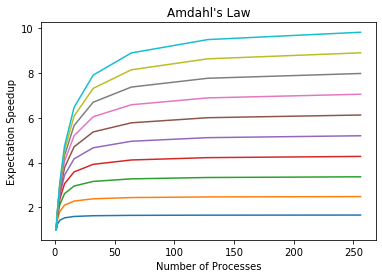

In [16]:
import numpy as np
from matplotlib import pyplot as plt

def s(n):
    return (2+n)/(n*n+2*n+2)

def speedup(s,p):
    return 1/(s+(1-s)/p)

plt.title("Amdahl's Law") 
plt.xlabel("Number of Processes") 
plt.ylabel("Expectation Speedup") 


p = [1]
temp = 1
for _ in range(8):
    temp = temp*2
    p.append(temp)


for n in range(1,11):
    serial = s(n)
    print("1/s = %.2f, for N = %d"%(1/serial,n))
    es = []
    for pi in p:
        es.append(speedup(serial,pi))
    plt.plot(p,es)
    
plt.show()
    

Form the printed result and the plot we can find that the upper bound of speedup is limited by $1/s$ as Amdal's law says. 

**(c)** [10] Confirm the importance of reducing the amount of serial $S$ code by plotting $S$ vs. efficiency/speedup using Amdahl's Law.

In this part we will take serial code $S$ from 100% to 10% with different number of processes.

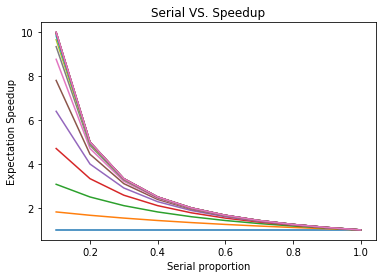

In [20]:
s = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
p = 1

plt.title("Serial VS. Speedup") 
plt.xlabel("Serial proportion") 
plt.ylabel("Expectation Speedup") 
while p<=65536:
    es = []
    for si in s:
        es.append(speedup(si,p))
    plt.plot(s,es)
    p =p*2
plt.show()

From the plot we know that by decreasing the proportion of serial part of a program, the speedup will become better and better. 

## 2 - Roofline Models

**(a)** [15] Pick a _specific_ chip and compute a roof-line model for it.  Feel free to make some assumptions as you will probably need to get the true memory bandwidth to main-memory.  Plot this roof-line model and justify the model.

For this part we will choose NVIDIA GeForce GTX 1080 Ti: maximum FLOPs per second:$11.3TFLOP/s$, maximum memory acess per second: $484GB/s$.
So in this case:
\begin{equation}
    \pi = 11.3TFLOP/s,\qquad \beta = 484GB/s.
\end{equation}
So,
\begin{equation}
    I = \frac{\pi}{\beta} = 23.9074
\end{equation}

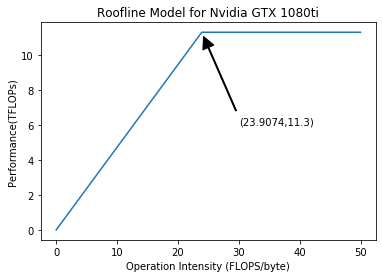

In [29]:
plt.title("Roofline Model for Nvidia GTX 1080ti")
plt.xlabel("Operation Intensity (FLOPS/byte)")
plt.ylabel("Performance(TFLOPs)")

def roofline(x):
    res = []
    sep = 11.3*1024/484.0
    for xi in x:
        if xi<=sep:
            res.append(11.3/sep*xi)
        else:
            res.append(11.3)

    return res
    
x = np.linspace(0,50,1000)

y = roofline(x)
plt.plot(x,y)
sep = 11.3*1024/484.0
plt.annotate('(23.9074,11.3)', xy=(sep, 11.3), xytext=(30, 6),arrowprops=dict(facecolor='black', shrink=0.05,width = 1))

plt.show()

**(b)** [10] Estimate the arithmetic intensity of the matrix vector product and plot it on your roof-line model.

In this case consider a matirx with the size of M\*N and a vector N\*1.

We will estimate the arithmetic intensity of a multiplication operation between them.

So first are the read and write operations. The total amount of data transferred is M\*N+N\*1+M\*1. 

Then, computing each entry of the result vector needs N multiplications and N-1 additions. So the total amount of calculation is M\*(2N-1).

Thus, the arithmetic instensity is $\frac{M(2N-1)}{MN+N+M}$.

Thus when M=N and as they go to infinity:
\begin{equation}
    \lim_{M,N\rightarrow\infty}I = 2
\end{equation}

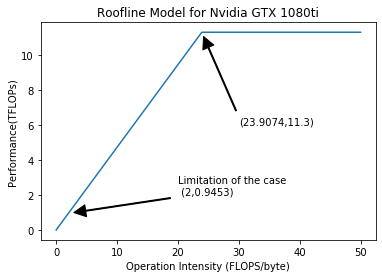

In [39]:
plt.title("Roofline Model for Nvidia GTX 1080ti")
plt.xlabel("Operation Intensity (FLOPS/byte)")
plt.ylabel("Performance(TFLOPs)")

def roofline(x):
    res = []
    sep = 11.3*1024/484.0
    for xi in x:
        if xi<=sep:
            res.append(11.3/sep*xi)
        else:
            res.append(11.3)

    return res
    
x = np.linspace(0,50,1000)

y = roofline(x)
plt.plot(x,y)
sep = 11.3*1024/484.0
plt.annotate('(23.9074,11.3)', xy=(sep, 11.3), xytext=(30, 6),arrowprops=dict(facecolor='black', shrink=0.05,width = 1))
plt.annotate('Limitation of the case\n (2,0.9453)', xy=(2,11.3/sep*2), xytext=(20, 2),arrowprops=dict(facecolor='black', shrink=0.05,width = 1))
plt.show()

**(c)** [15] Look through the scientific and engineering literature for articles that discuss their estimate for their arithmetic intensity and plot it on your model above.  Discuss how they came to their conclusion.

I choose one article Data-type Aware Arithmetic Intensity for Deep Neural Networks$^{[1]}$ in which it gives the arithmetic intensities of MobileNet-v1 and MobileNet-V2 which are machine learning frameworks.

MobileNet-v1:18, MobileNet-V2:32

[1] Jha, N. K., Mittal, S., & Avancha, S. Data-type Aware Arithmetic Intensity for Deep Neural Networks. Energy, 120, x109.

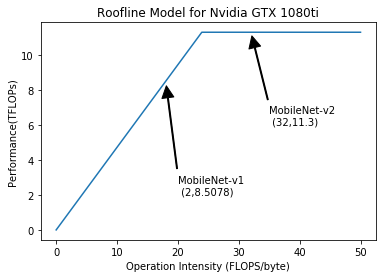

In [43]:
plt.title("Roofline Model for Nvidia GTX 1080ti")
plt.xlabel("Operation Intensity (FLOPS/byte)")
plt.ylabel("Performance(TFLOPs)")

def roofline(x):
    res = []
    sep = 11.3*1024/484.0
    for xi in x:
        if xi<=sep:
            res.append(11.3/sep*xi)
        else:
            res.append(11.3)

    return res
    
x = np.linspace(0,50,1000)

y = roofline(x)
plt.plot(x,y)
sep = 11.3*1024/484.0

plt.annotate('MobileNet-v1\n (2,8.5078)', xy=(18,11.3/sep*18), xytext=(20, 2),arrowprops=dict(facecolor='black', shrink=0.05,width = 1))
plt.annotate('MobileNet-v2\n (32,11.3)', xy=(32, 11.3), xytext=(35, 6),arrowprops=dict(facecolor='black', shrink=0.05,width = 1))
plt.show()

## 3 - Scalability

[20] Explore the scientific and engineering literature for discussions of approaches to problems with an emphasis on scalability.  For instance, if you wanted to solve for the first few eigenvalues of a matrix, what is the most scalable way to do so (do not do this one).  You can pick from any field.

I choose the article Performance modeling and analysis of parallel Gaussian elimination on multi-core computers$^{[2]}$ by Fadi N.Sibai.

Here is the abstract of it:

Gaussian elimination is used in many applications and in particular in the solution of systems of linear equations. This paper presents mathematical performance models and analysis of four parallel Gaussian Elimination methods (precisely the Original method and the new Meet in the Middle –MiM– algorithms and their variants with SIMD vectorization) on multi-core systems. Analytical performance models of the four methods are formulated and presented followed by evaluations of these models with modern multi-core systems' operation latencies. Our results reveal that the four methods generally exhibit good performance scaling with increasing matrix size and number of cores. SIMD vectorization only makes a large difference in performance for low number of cores. For a large matrix size (n ⩾ 16 K), the performance difference between the MiM and Original methods falls from 16× with four cores to 4× with 16 K cores. The efficiencies of all four methods are low with 1 K cores or more stressing a major problem of multi-core systems where the network-on-chip and memory latencies are too high in relation to basic arithmetic operations. Thus Gaussian Elimination can greatly benefit from the resources of multi-core systems, but higher performance gains can be achieved if multi-core systems can be designed with lower memory operation, synchronization, and interconnect communication latencies, requirements of utmost importance and challenge in the exascale computing age.

[2] Sibai F N. Performance modeling and analysis of parallel Gaussian elimination on multi-core computers[J]. Journal of King Saud University-Computer and Information Sciences, 2014, 26(1): 41-54.